In [21]:
import numpy as np
import torch
from torch import nn
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed(2019)

In [2]:
x_train = np.linspace(-5, 5, 10)

In [4]:
x_train

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [5]:
y_train = 2*x_train + 1
y_train

array([-9.        , -6.77777778, -4.55555556, -2.33333333, -0.11111111,
        2.11111111,  4.33333333,  6.55555556,  8.77777778, 11.        ])

In [18]:
y_rand = [np.random.normal(-1, 1, None) for i in range(10)]

In [19]:
y_train = y_train + y_rand
y_train

array([-10.3490515 ,  -8.21420117,  -5.90206375,  -0.8742802 ,
        -1.00244479,   1.33922443,   2.80653687,   3.24740737,
         7.17027505,   6.30341222])

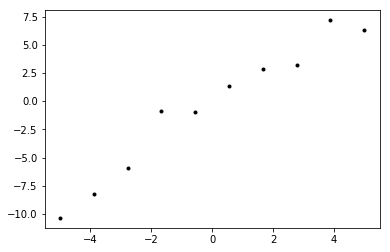

In [20]:
plt.plot(x_train, y_train, 'k.')

In [24]:
X_train = x_train.reshape(10, 1)

In [25]:
X_train

array([[-5.        ],
       [-3.88888889],
       [-2.77777778],
       [-1.66666667],
       [-0.55555556],
       [ 0.55555556],
       [ 1.66666667],
       [ 2.77777778],
       [ 3.88888889],
       [ 5.        ]])

In [27]:
y_train = y_train.reshape(10, 1)
print(y_train)

[[-10.3490515 ]
 [ -8.21420117]
 [ -5.90206375]
 [ -0.8742802 ]
 [ -1.00244479]
 [  1.33922443]
 [  2.80653687]
 [  3.24740737]
 [  7.17027505]
 [  6.30341222]]


## 定义模型

In [22]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.linear(x) 
        return out

In [28]:
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [29]:
from torch import optim

In [30]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [31]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [45]:
epochs = 1000
for epoch in range(epochs):
    inputs = X_train.float().cuda()
    target = y_train.float().cuda()
    out = model(inputs)
    loss = criterion(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print("Epoch {}/{} , loss: {}".format(epoch+1, epochs, loss.data.cpu().numpy()))

Epoch 20/1000 , loss: 1.5668097734451294
Epoch 40/1000 , loss: 1.5664174556732178
Epoch 60/1000 , loss: 1.5660549402236938
Epoch 80/1000 , loss: 1.565720558166504
Epoch 100/1000 , loss: 1.5654118061065674
Epoch 120/1000 , loss: 1.5651267766952515
Epoch 140/1000 , loss: 1.564864158630371
Epoch 160/1000 , loss: 1.5646212100982666
Epoch 180/1000 , loss: 1.5643969774246216
Epoch 200/1000 , loss: 1.56419038772583
Epoch 220/1000 , loss: 1.5639992952346802
Epoch 240/1000 , loss: 1.5638229846954346
Epoch 260/1000 , loss: 1.5636603832244873
Epoch 280/1000 , loss: 1.5635101795196533
Epoch 300/1000 , loss: 1.5633716583251953
Epoch 320/1000 , loss: 1.5632436275482178
Epoch 340/1000 , loss: 1.5631256103515625
Epoch 360/1000 , loss: 1.5630168914794922
Epoch 380/1000 , loss: 1.5629160404205322
Epoch 400/1000 , loss: 1.5628230571746826
Epoch 420/1000 , loss: 1.5627374649047852
Epoch 440/1000 , loss: 1.562658429145813
Epoch 460/1000 , loss: 1.5625852346420288
Epoch 480/1000 , loss: 1.562517762184143
Ep

In [46]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.7274]], device='cuda:0')),
             ('linear.bias', tensor([-0.5375], device='cuda:0'))])

In [48]:
model.eval()
predict = model(X_train.float().cuda())

In [51]:
predict = predict.data.cpu().numpy()

In [52]:
X = X_train.float().numpy()

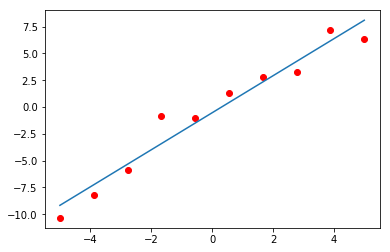

In [53]:
plt.plot(X, y_train.float().numpy(), 'ro')
plt.plot(X, predict, label='Fit Line')

In [54]:
?nn.Linear